# 1) Pesos en la función de correlación (estimador de Landy-Salay)

a) Construye dos anillos concéntricos de radios distintos y ancho fijo, pero que el radio mayor del anillo más pequeño sea igual al radio menor del anillo más grande (ie ambos anillos deben de verse como un solo anillo del doble de ancho). La densidad de ambos anillos debe de ser igual. Grafica la distribución poniendo color rojo a los puntos del anillo pequeño y azul a los del grande.

In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
import scipy.spatial.distance as dist
from scipy.fftpack import fft, fftfreq
%matplotlib inline

In [88]:
def anillo_random(rad_ex,rad_in,puntos):  #Depende del radio esterior y interior, ademas de la cantidad de puntos dentro de él.
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

In [91]:
anillos_ran = []
radio_ex_1 = 500
radio_in_1 = 450

radio_ex_2 = 450
radio_in_2 = 400

puntos_g = 1200
puntos_ch = int((puntos_g)*((radio_in_1**2)-(radio_in_2**2))/((radio_ex_1**2)-(radio_in_1**2)))

#datos sólo para graficar:
anillos_ran_g = anillo_random(radio_ex_1,radio_in_1,puntos_g)
anillos_ran_ch = anillo_random(radio_ex_2,radio_in_2,puntos_ch)

#Arreglo para trabajar:
anillos_ran = np.append(anillos_ran,anillos_ran_g)
anillos_ran = np.append(anillos_ran,anillos_ran_ch)
anillos_ran = np.reshape(anillos_ran,(int(len(anillos_ran)/2),2))

(-800, 800)

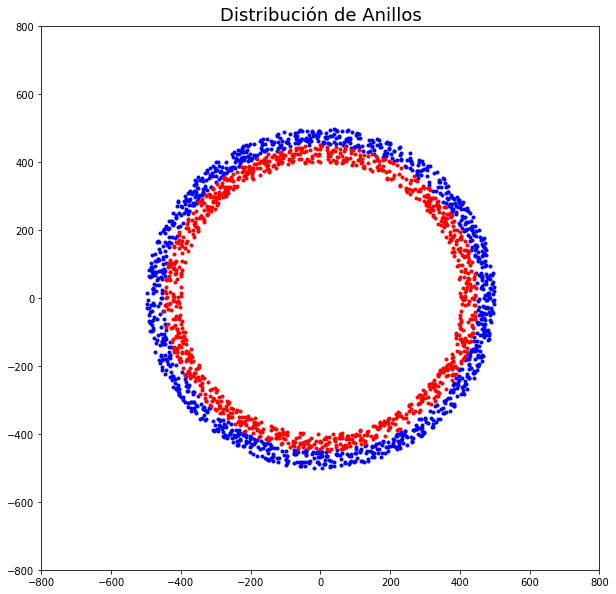

In [92]:
#graficamos los puntos
plt.figure(figsize=(10,10))
plt.title('Distribución de Anillos',fontsize = 18)
plt.plot(anillos_ran_g[:,0],anillos_ran_g[:,1], 'b.')
plt.plot(anillos_ran_ch[:,0],anillos_ran_ch[:,1], 'r.')
plt.xlim(-800,800)
plt.ylim(-800,800)

b) Mide la función de correlación asignando los siguientes pesos a cada punto: para puntos en el anillo pequeño (rojos) usa un peso de $2$, mientras que para puntos en el anillo grande (azules) usa $\frac{1}{2}$. Sobrepon en una gráfica la función de correlación sin pesos con la de pesos, y describe las diferencias en palabras.

####  Estimador de Landy-Salay: 

In [93]:
#función para calcular el estimador Landy-slay:
def Lan_Sza(DD,RR,DR,Nd,Nr):
    n_1 = (Nr*(Nr-1))/(Nd*(Nd-1))
    n_2 = (Nr-1)/(Nd)
    return  1 + ((np.divide(DD,RR))*n_1) - 2*((np.divide(DR,RR))*n_2)

In [94]:
#fución para cacular distancia entre cada punto de un arreglo:
def dis_NN(m): 
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(m[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(m[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

In [95]:
#funcion para calcular distacnia entre puntos de dos arreglos distintos:
def dis_MN(m,n):
    a = []
    b = []
    dis = []
    for i in range(len(n)):
        a.append(m[:,0]-n[:,0][i]) #guardamos las difrerencias en x
        b.append(m[:,1]-n[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

In [96]:
#funcion para hacer histograma:
def Histo_dist (Dist,bins_0):
    frec, b = np.histogram(Dist, bins = bins_0)
    return frec, b

In [97]:
#función para hacer caja randooms:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [98]:
#Distancia entre cada punto del arrglo:
dis_anillo_ch = dis_NN(anillos_ran_ch)
dis_anillo_g = dis_NN(anillos_ran_g)
#sin peso
dis_anillo = []
dis_anillo = np.append(dis_anillo,dis_anillo_ch) 
dis_anillo = np.append(dis_anillo,dis_anillo_g)

In [99]:
dimencion = 800
puntos = len(anillos_ran)*2
R_anillo = caja_Rand(dimencion,puntos) #hacemos la caja

In [100]:
dis_R_anillo = dis_NN(R_anillo)

In [101]:
dis_DR_anillo_ch = dis_MN(anillos_ran_ch,R_anillo)
dis_DR_anillo_g = dis_MN(anillos_ran_g,R_anillo)
#sin peso 
dis_DR_anillo = []
dis_DR_anillo = np.append(dis_DR_anillo,dis_DR_anillo_ch)
dis_DR_anillo = np.append(dis_DR_anillo,dis_DR_anillo_g)
#con peso 
dis_DR_anillo_w = []
dis_DR_anillo_w = np.append(dis_DR_anillo_w,w_ch*dis_DR_anillo_ch)
dis_DR_anillo_w = np.append(dis_DR_anillo_w,w_g*dis_DR_anillo_g)

#### Histogramas

In [123]:
binn = 150
DD_anillo_ch, bins_D_anillo_ch = Histo_dist(dis_anillo_ch,binn)
DD_anillo_g, bins_D_anillo_g = Histo_dist(dis_anillo_g,binn)
DD_anillo, bins_D_anillo = Histo_dist(dis_anillo,binn)



151

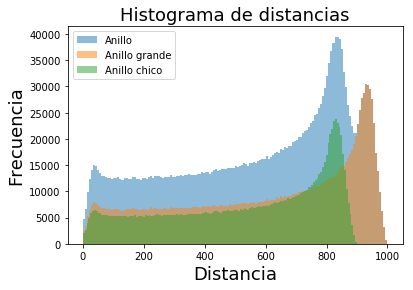

In [124]:
plt.figure()
plt.hist(dis_anillo, bins=binn, alpha = 0.5, label="Anillo")
plt.hist(dis_anillo_g, bins=binn, alpha = 0.5, label="Anillo grande")
plt.hist(dis_anillo_ch, bins=binn, alpha = 0.5, label="Anillo chico")
plt.title("Histograma de distancias",fontsize=18)
plt.ylabel("Frecuencia",fontsize=18) 
plt.xlabel("Distancia",fontsize=18)
plt.legend(fontsize = 10);
plt.show()

In [110]:
DD_anillo_w, bins_D_anillo_w = Histo_dist(dis_anillo_w,binn)

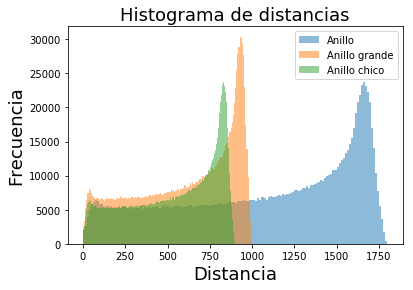

In [105]:
plt.figure()
plt.hist(dis_anillo_w, bins=binn, alpha = 0.5, label="Anillo")
plt.hist(dis_anillo_g, bins=binn, alpha = 0.5, label="Anillo grande")
plt.hist(dis_anillo_ch, bins=binn, alpha = 0.5, label="Anillo chico")
plt.title("Histograma de distancias",fontsize=18)
plt.ylabel("Frecuencia",fontsize=18) 
plt.xlabel("Distancia",fontsize=18)
plt.legend(fontsize = 10);
plt.show()

In [71]:
RR_anillo, bins_R_anillo = Histo_dist(dis_R_anillo,binn)

In [72]:
DR_anillo_ch, bins_DR_anillo_ch = Histo_dist(dis_DR_anillo_ch,binn)
DR_anillo_g, bins_DR_anillo_g = Histo_dist(dis_DR_anillo_g,binn)
DR_anillo, bins_DR_anillo = Histo_dist(dis_DR_anillo,binn)
DR_anillo_w, bins_DR_anillo_w = Histo_dist(dis_DR_anillo_w,binn)


In [84]:
LS_anillo = Lan_Sza(DD_anillo,RR_anillo,DR_anillo,len(anillos_ran),len(R_anillo))
LS_anillo_w = Lan_Sza(DD_anillo_w,RR_anillo,DR_anillo_w,len(anillos_ran),len(R_anillo))

No handles with labels found to put in legend.


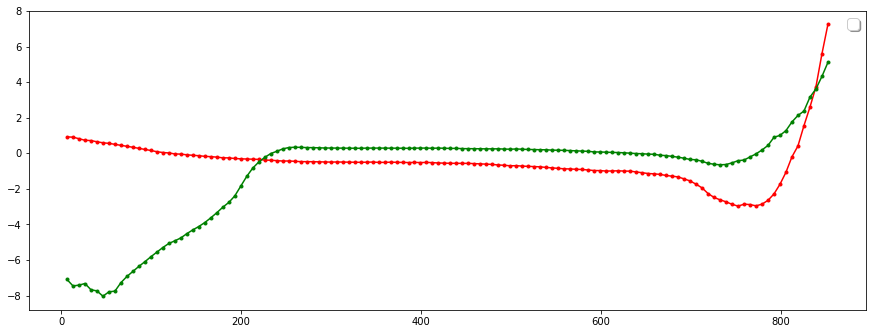

In [85]:
l_0 = 1
l_1 = 21
plt.figure(figsize=(15,5.5))
plt.plot(bins_D_anillo[l_0:-(l_1+1)],LS_anillo[l_0:-l_1],'r.-')
plt.plot(bins_D_anillo[l_0:-(l_1+1)],LS_anillo_w[l_0:-l_1],'g.-')
plt.legend(shadow=True, fontsize='x-large')

In [75]:
#Función para calcular transformada de fourier:
def fourire(x_n, L ,dim):
    j = complex(0,1)
    N = len(x_n) 
    k_n = x_n
    P_k = []
    for i in range(N): 
         P_k.append( (L**dim)*pow(abs(np.sum(np.exp(-j*(k_n[i]*x_n)))/N),2) - (L**dim/N))
    return P_k

In [76]:
P_anillo = fourire(LS_anillo[l_0:-l_1],100,1)
P_anillo_w = fourire(LS_anillo_w[l_0:-l_1],100,1)

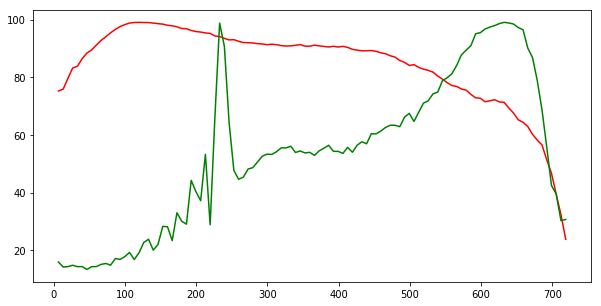

In [77]:
plt.figure(figsize=(10,5))
plt.plot(bins_D_anillo[l_0:-(l_1+1)],P_anillo,'r-')
plt.plot(bins_D_anillo[l_0:-(l_1+1)],P_anillo_w,'g-')
#plt.ylim(-3,20)
#plt.xlim(20,40)

In [78]:
#Función para calcular transformada de fourier:
def fourire_w(x_n, L ,dim, w):
    
    w_ch, w_g = w
    
    w_b = []
    w_b = np.append(w_b,w_ch)
    w_b = np.append(w_b,w_g)
    
    #pesos
    w_1 = L**dim * w_ch[0]
    w_2 = L**dim * w_g[0]
    
    s_w = pow(np.sum(w_ch) + np.sum(w_g),2) 
    
    
    j = complex(0,1)
    N = len(x_n)
    k_n = x_n
    P_k = []
    s_exp = []
    for i in range(N): 
         s_exp = np.append(s_exp,np.sum(w_b[i]*np.exp(-j*(k_n[i]*x_n)))/N)
    P_k = np.append(P_k,((L**dim/s_w)*np.power(np.abs((((w_ch[0] + w_g[0])*L**dim/(N*L**dim))*s_exp)-w_b),2))-((w_ch[0] + w_g[0])*L**dim)/N)
    return P_k

In [79]:
#Pesos para cada punto de cada anillos 
w_ch = np.ones(int(len(LS_anillo[l_0:-l_1])/2))*2
w_g = np.ones(int(len(LS_anillo[l_0:-l_1])/2))*(1/2)
w = w_ch, w_g

In [80]:
P_anillo_w = fourire_w(LS_anillo[l_0:-l_1], 100 ,1, w)

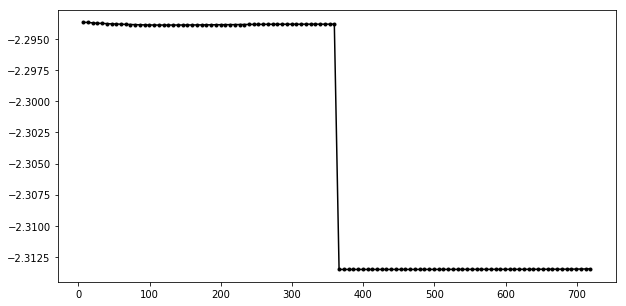

In [81]:
plt.figure(figsize=(10,5))
plt.plot(bins_D_anillo[l_0:-(l_1+1)],P_anillo_w,'k.-')
#plt.ylim(-3,20)
#plt.xlim(20,40)